In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../csv/cell_samples.csv')
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
df.shape

(699, 11)

In [10]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [36]:
df['BareNuc'].value_counts()
df = df[df['BareNuc'] != '?']
df.shape

(683, 11)

In [37]:
x = np.asanyarray(df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh','BareNuc', 'SingEpiSize', 'BlandChrom', 'NormNucl', 'Mit']])
x = preprocessing.StandardScaler().fit(x).transform(x)
x[:5]
x.shape

(683, 9)

In [53]:
df['Class'] = df['Class'].astype('int')
y = np.asanyarray(df['Class'])
y[:5]
y.shape

(683,)

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=4)

print('Train set: ',X_train.shape, Y_train.shape )
print('Test set: ', X_test.shape, Y_test.shape)

Train set:  (546, 9) (546,)
Test set:  (137, 9) (137,)


In [55]:
from sklearn import svm

clf = svm.SVC(kernel='rbf')
clf.fit(X_train, Y_train)


SVC()

In [57]:
y_hat = clf.predict(X_test)
y_hat[:5]

array([2, 4, 2, 4, 2])

In [59]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

#Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, y_hat, labels = [2,4])
np.set_printoptions(precision=2)
print(classification_report(Y_test, y_hat))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



In [62]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix without normalization')
    print(cm)

    plt.imshow(cm, interpolation = 'nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j], fmt), horizontalalignment = "center", color='white' if cm[i,j]>thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix without normalization
[[85  5]
 [ 0 47]]


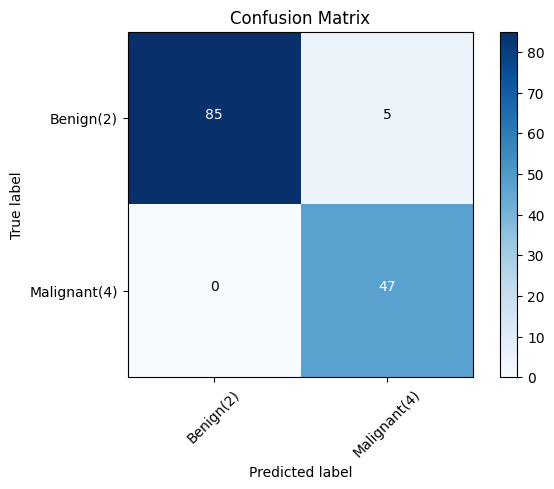

In [63]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)', 'Malignant(4)'], normalize=False, title = 'Confusion Matrix')

In [60]:
from sklearn.metrics import accuracy_score

print ("Accuracy : ", accuracy_score(Y_test,y_hat)*100)

Accuracy :  96.35036496350365


In [68]:
from sklearn.metrics import f1_score, jaccard_score

print("F1 score: ",f1_score(Y_test, y_hat, average='weighted'))

print("Jaccard score: " , jaccard_score(Y_test, y_hat, average='weighted'))

F1 score:  0.9639038982104676
Jaccard score:  0.9305165637282425
